In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import itertools
import warnings
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import statsmodels.api as sm
import xgboost as xgb
np.random.seed(25)
#from sklearn.cross_validation import train_test_split # For splitting the data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # K neighbors classification model
from sklearn.naive_bayes import GaussianNB # Gaussian Naive bayes classification model
from sklearn.svm import SVC # Support Vector Classifier model
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier model
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier model
from sklearn.metrics import accuracy_score # For checking the accuracy of the model

In [ ]:
app_train = pd.read_csv('app_train.csv')
installment_payment = pd.read_csv('installment_payment.csv')
prev_app = pd.read_csv('prev_app.csv')

In [ ]:
#import data test
#app_test = pd.read_csv('Data Scientist Test/app_test.csv')

In [ ]:
app_train.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [ ]:
installment_payment.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000


In [ ]:
prev_app.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0


In [ ]:
#app_test.head()

In [ ]:
'''app_train {} , 
installment_payment : {} , 
prev_app : {} '''.format(app_train.shape, 
                         installment_payment.shape, 
                         prev_app.shape)

'app_train (61503, 24) , \ninstallment_payment : (2872306, 8) , \nprev_app : (350712, 19) '

In [ ]:
app_train['LN_ID'].isin(installment_payment['LN_ID']).value_counts()

True     58309
False     3194
Name: LN_ID, dtype: int64

In [ ]:
app_train['LN_ID'].isin(prev_app['LN_ID']).value_counts()

True     58177
False     3326
Name: LN_ID, dtype: int64

In [ ]:
df = pd.merge(app_train, prev_app, on='LN_ID', how='inner')
df1 = pd.merge(df, installment_payment, on=['LN_ID','SK_ID_PREV'], how='inner')

In [ ]:
df1.shape

(2108580, 48)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108580 entries, 0 to 2108579
Data columns (total 48 columns):
Unnamed: 0_x                 int64
LN_ID                        int64
TARGET                       int64
CONTRACT_TYPE_x              object
GENDER                       object
NUM_CHILDREN                 int64
INCOME                       float64
APPROVED_CREDIT_x            float64
ANNUITY_x                    float64
PRICE_x                      float64
INCOME_TYPE                  object
EDUCATION                    object
FAMILY_STATUS                object
HOUSING_TYPE                 object
DAYS_AGE                     int64
DAYS_WORK                    int64
DAYS_REGISTRATION            float64
DAYS_ID_CHANGE               int64
WEEKDAYS_APPLY_x             object
HOUR_APPLY_x                 int64
ORGANIZATION_TYPE            object
EXT_SCORE_1                  float64
EXT_SCORE_2                  float64
EXT_SCORE_3                  float64
Unnamed: 0_y           

In [ ]:
df1.iloc[0]

Unnamed: 0_x                                        201468
LN_ID                                               333538
TARGET                                                   0
CONTRACT_TYPE_x                            Revolving loans
GENDER                                                   F
NUM_CHILDREN                                             1
INCOME                                               67500
APPROVED_CREDIT_x                                   202500
ANNUITY_x                                            10125
PRICE_x                                             202500
INCOME_TYPE                                        Working
EDUCATION                    Secondary / secondary special
FAMILY_STATUS                                      Married
HOUSING_TYPE                                  With parents
DAYS_AGE                                            -11539
DAYS_WORK                                             -921
DAYS_REGISTRATION                                     -1

In [ ]:
null_counts = df1.isnull().sum()
null_counts.sort_values(ascending=False)

EXT_SCORE_1                  1197206
AMT_DOWN_PAYMENT             1046325
PRICE_y                       394751
EXT_SCORE_3                   379683
EXT_SCORE_2                     2534
PRICE_x                         1602
NFLAG_INSURED_ON_APPROVAL        571
TERMINATION                      571
FIRST_DUE                        571
FIRST_DRAW                       571
AMT_PAY                          492
PAY_DAYS                         492
ANNUITY_x                         37
DAYS_ID_CHANGE                     0
DAYS_WORK                          0
DAYS_AGE                           0
HOUSING_TYPE                       0
FAMILY_STATUS                      0
EDUCATION                          0
INCOME_TYPE                        0
TERM_PAYMENT                       0
APPROVED_CREDIT_x                  0
INCOME                             0
NUM_CHILDREN                       0
GENDER                             0
CONTRACT_TYPE_x                    0
TARGET                             0
L

In [ ]:
data = df1.drop(["EXT_SCORE_1","AMT_DOWN_PAYMENT","PRICE_y","EXT_SCORE_3","EXT_SCORE_2","PRICE_x",
                            "NFLAG_INSURED_ON_APPROVAL","TERMINATION","FIRST_DUE","FIRST_DRAW","TERM_PAYMENT",
                            "AMT_PAY","PAY_DAYS","ANNUITY_x"], axis=1)
data1 = data.dropna(axis=0)

In [ ]:
display(data.shape)
data1.shape

(2108580, 34)

(2108580, 34)

In [ ]:
data1['TARGET'].value_counts()

0    1946154
1     162426
Name: TARGET, dtype: int64

In [ ]:
print(data1.dtypes.value_counts())

int64      14
object     12
float64     8
dtype: int64


In [ ]:
object_columns_df = data1.select_dtypes(include=["object"])
print (object_columns_df.iloc[0])

CONTRACT_TYPE_x                    Revolving loans
GENDER                                           F
INCOME_TYPE                                Working
EDUCATION            Secondary / secondary special
FAMILY_STATUS                              Married
HOUSING_TYPE                          With parents
WEEKDAYS_APPLY_x                           TUESDAY
ORGANIZATION_TYPE           Business Entity Type 3
CONTRACT_TYPE_y                     Consumer loans
WEEKDAYS_APPLY_y                            MONDAY
CONTRACT_STATUS                           Approved
YIELD_GROUP                                 middle
Name: 0, dtype: object


In [ ]:
categorical_columns = ['CONTRACT_TYPE_x', 'ORGANIZATION_TYPE', 'GENDER', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS', 'HOUSING_TYPE', 'WEEKDAYS_APPLY_x', 'CONTRACT_TYPE_y', 'WEEKDAYS_APPLY_y', 'CONTRACT_STATUS', 'YIELD_GROUP']
dummy_df = pd.get_dummies(data1[categorical_columns])

In [ ]:
loan_data = pd.concat([data1, dummy_df], axis=1)
loan_data = loan_data.drop(categorical_columns, axis=1)

In [ ]:
loan_data.shape

(2108580, 129)

In [ ]:
cols = loan_data.columns
train_cols = cols.drop('TARGET')
features = loan_data[train_cols]
target = loan_data['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split # For splitting the data into training and testing
# Splitting feature data and target into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9997097572774094


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=features.columns).sort_values(ascending=False)
feature_imp

DAYS_AGE                                    5.641395e-02
DAYS_ID_CHANGE                              5.553808e-02
DAYS_REGISTRATION                           5.524512e-02
Unnamed: 0_x                                5.169735e-02
LN_ID                                       5.091876e-02
APPROVED_CREDIT_x                           5.044359e-02
DAYS_WORK                                   4.856806e-02
INCOME                                      4.037244e-02
DAYS_DECISION                               3.937687e-02
Unnamed: 0_y                                3.823019e-02
HOUR_APPLY_x                                3.699678e-02
SK_ID_PREV                                  3.661996e-02
ANNUITY_y                                   3.370849e-02
APPROVED_CREDIT_y                           3.360871e-02
APPLICATION                                 2.991513e-02
HOUR_APPLY_y                                2.735287e-02
AMT_INST                                    2.311891e-02
Unnamed: 0                     

No handles with labels found to put in legend.


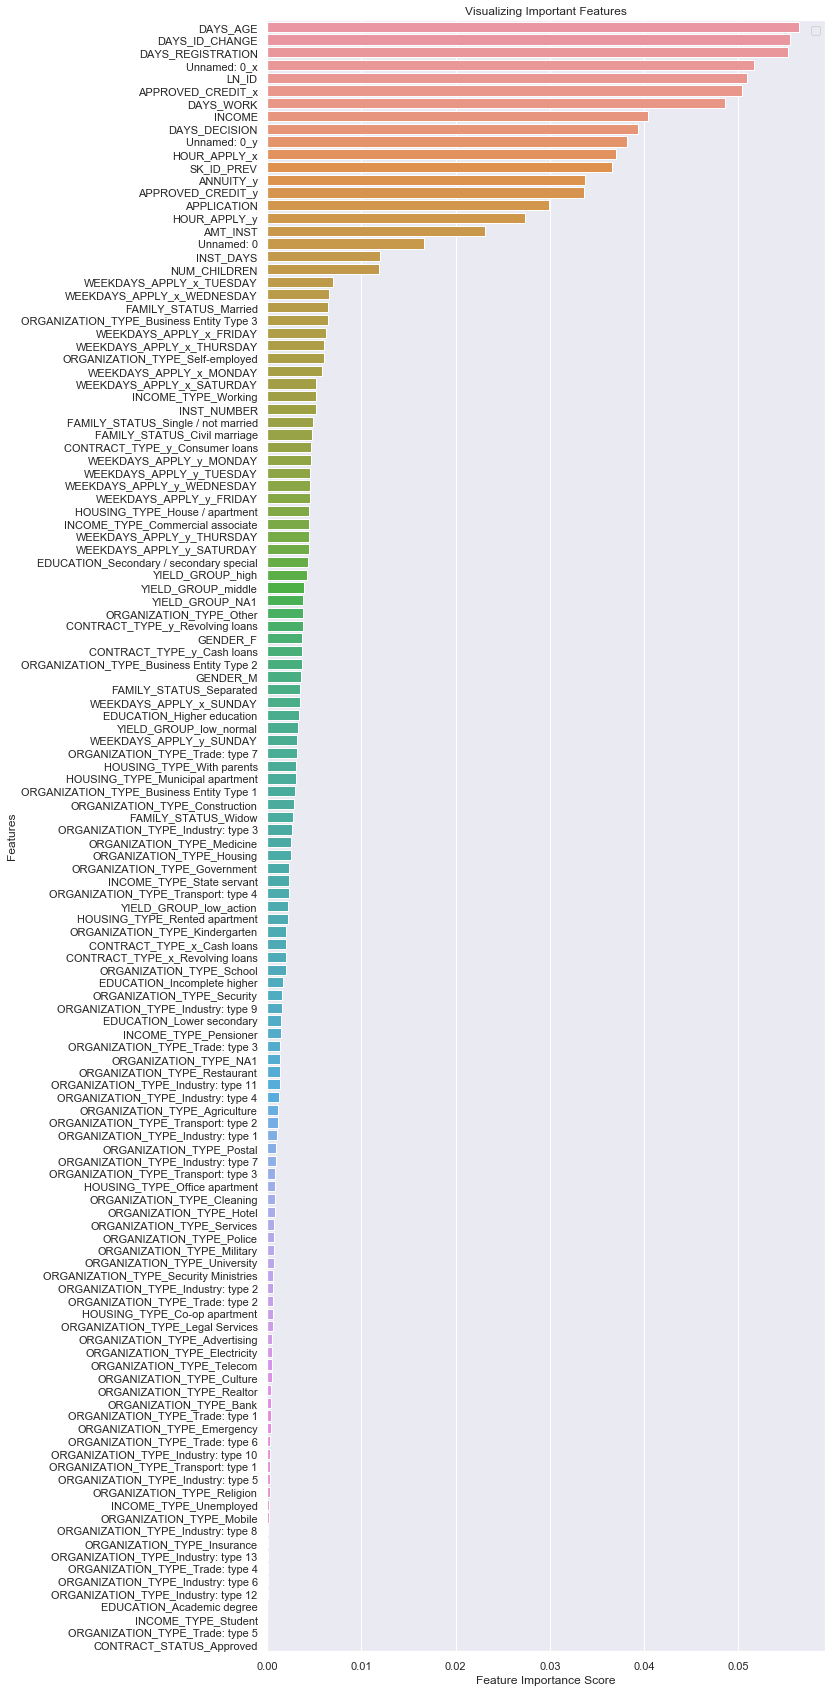

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(10,30))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
#plt.figure(figsize=(10,30))

In [ ]:
fi = feature_imp.where(feature_imp>0.01)
fi = fi.dropna(axis=0)
fi

DAYS_AGE             0.056414
DAYS_ID_CHANGE       0.055538
DAYS_REGISTRATION    0.055245
Unnamed: 0_x         0.051697
LN_ID                0.050919
APPROVED_CREDIT_x    0.050444
DAYS_WORK            0.048568
INCOME               0.040372
DAYS_DECISION        0.039377
Unnamed: 0_y         0.038230
HOUR_APPLY_x         0.036997
SK_ID_PREV           0.036620
ANNUITY_y            0.033708
APPROVED_CREDIT_y    0.033609
APPLICATION          0.029915
HOUR_APPLY_y         0.027353
AMT_INST             0.023119
Unnamed: 0           0.016689
INST_DAYS            0.011953
NUM_CHILDREN         0.011901
dtype: float64

In [ ]:
clean_data = loan_data[['DAYS_AGE', 'TARGET', 'DAYS_ID_CHANGE','DAYS_REGISTRATION', 'LN_ID','Unnamed: 0_x',
                        'APPROVED_CREDIT_x','DAYS_WORK','INCOME','DAYS_DECISION','Unnamed: 0_y',
                        'HOUR_APPLY_x','SK_ID_PREV','ANNUITY_y','APPROVED_CREDIT_y','APPLICATION',
                        'HOUR_APPLY_y','AMT_INST','Unnamed: 0','NUM_CHILDREN','INST_DAYS']]

In [ ]:
# cleaned and filtered data to csv
clean_data.to_csv('clean_loan_data.csv', index = False)

In [ ]:
clean_data = pd.read_csv('clean_loan_data.csv')

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108580 entries, 0 to 2108579
Data columns (total 21 columns):
DAYS_AGE             int64
TARGET               int64
DAYS_ID_CHANGE       int64
DAYS_REGISTRATION    float64
LN_ID                int64
Unnamed: 0_x         int64
APPROVED_CREDIT_x    float64
DAYS_WORK            int64
INCOME               float64
DAYS_DECISION        int64
Unnamed: 0_y         int64
HOUR_APPLY_x         int64
SK_ID_PREV           int64
ANNUITY_y            float64
APPROVED_CREDIT_y    float64
APPLICATION          float64
HOUR_APPLY_y         int64
AMT_INST             float64
Unnamed: 0           int64
NUM_CHILDREN         int64
INST_DAYS            float64
dtypes: float64(8), int64(13)
memory usage: 337.8 MB


In [ ]:
predictions = pd.Series(np.ones(clean_data.shape[0]))

false_positive_filter = (predictions == 1) & (clean_data['TARGET'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (clean_data['TARGET'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (clean_data['TARGET'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (clean_data['TARGET'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + true_negative)

print (true_positive_rate) 
print (false_positive_rate)

1.0
1.0


In [ ]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive+ false_negative + true_negative)
accuracy

0.07703098767891188

In [ ]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

0.07703098767891188

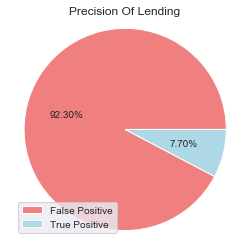

In [ ]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision Of Lending', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, 
                               #bootstrap = True,
                               #max_features = 'sqrt')
# Fit on training data
#model.fit(features, target)

In [ ]:
cols = clean_data.columns
train_cols = cols.drop('TARGET')

features = clean_data[train_cols]

target = clean_data['TARGET']

In [ ]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(features, target)
#predictions = lr.predict(features)

In [ ]:
from sklearn.model_selection import train_test_split # For splitting the data into training and testing
# Splitting feature data and target into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [ ]:
# Creating a python list containing all defined models
#model = [GaussianNB(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=5, random_state=0), LogisticRegression()]
#model_names = ["Gaussian Naive bayes", "K-nearest neighbors", "Support vector classifier", "Decision tree classifier", "Random Forest", "Logistic Regression",]
#for i in range(0, 6):
#    y_pred = model[i].fit(X_train, y_train).predict(X_test)
#    accuracy = accuracy_score(y_pred, y_test)*100
#    print(model_names[i], ":", accuracy, "%")

In [ ]:
#model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [ ]:
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
kf = KFold(features.shape[0], random_state=42)

predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\Khafidh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
false_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
false_positive = len(predictions[false_positive_filter])

true_positive_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
true_positive = len(predictions[true_positive_filter])

false_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
false_negative = len(predictions[false_negative_filter])

true_negative_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
true_negative = len(predictions[true_negative_filter])

true_positive_rate = float(true_positive)/float((true_positive + false_negative))
false_positive_rate = float(false_positive)/float((false_positive + true_negative))

print float(true_positive_rate) 
print float(false_positive_rate)

In [ ]:
accuracy = float(true_positive + true_negative)/float(true_positive + false_positive+ false_negative + true_negative)
accuracy

In [ ]:
precision = float(true_positive)/float(true_positive + false_positive)
precision

In [ ]:
# Data to plot
labels = 'False Positive', 'True Positive'
sizes = [1-precision, precision]
colors = ['lightcoral', 'lightblue'] 
# Plot
plt.figure(figsize=(4,4))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision of Random Forest', fontsize=12) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()